In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## For this lab, we still keep using the marketing_customer_analysis.csv ##

## 01 - Problem (case study): Data Description + Goal ##

In [102]:
# Predicting the total claim amount based on the data provided (marketing_customer_analysis.csv)

## 02 - Getting Data: Read the .csv file ##

In [103]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [104]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [105]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [106]:
data.select_dtypes('float')

,Customer Lifetime Value,Total Claim Amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879
...,...,...
9129,23405.987980,198.234764
9130,3096.511217,379.200000
9131,8163.890428,790.784983
9132,7524.442436,691.200000


In [107]:
data.select_dtypes('object')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [108]:
data.shape #before checking for duplicates

(9134, 24)

In [112]:
#data.select_dtypes('object') #check for removal of the column
data.shape

(9134, 24)

## 03 - Cleaning/Wrangling/EDA: ##

### Change headers names #

In [113]:
data.columns = [val.lower().replace(' ','_') for val in data.columns]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [116]:
data = data.drop(['customer'], axis=1)

In [117]:
#check unique values for cleaning
data['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [118]:
data = data.drop_duplicates()

In [119]:
data.shape

(8971, 23)

In [120]:
#check unique values for cleaning
data['state'].value_counts().unique

<bound method Series.unique of California    3081
Oregon        2543
Arizona       1682
Nevada         872
Washington     793
Name: state, dtype: int64>

In [121]:
#check unique values for cleaning
X_Cat = data.select_dtypes(include=np.object)
for val in X_Cat.columns:
    print(X_Cat[val].unique())
    

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2

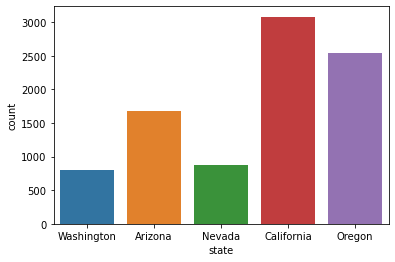

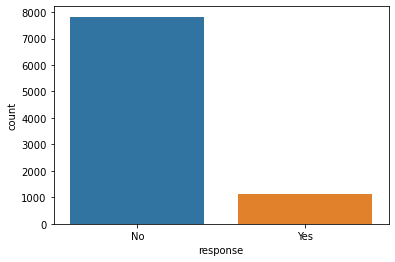

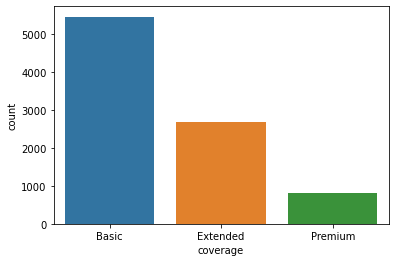

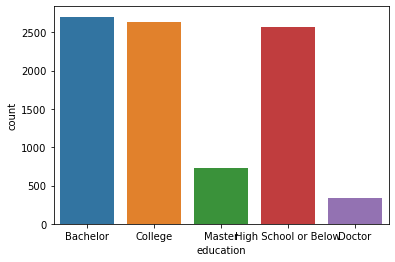

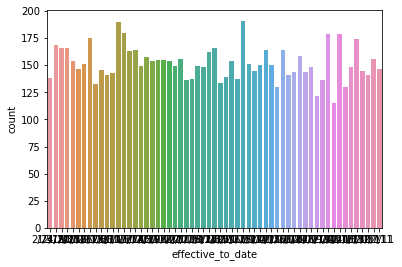

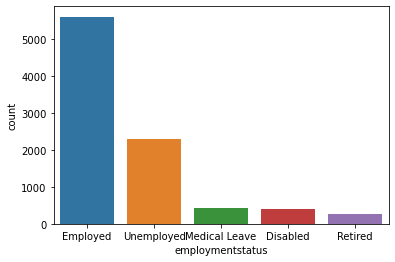

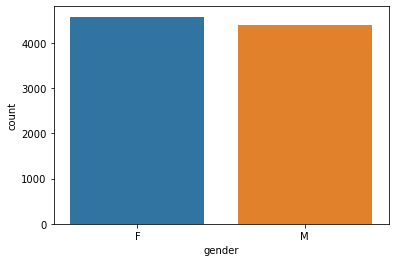

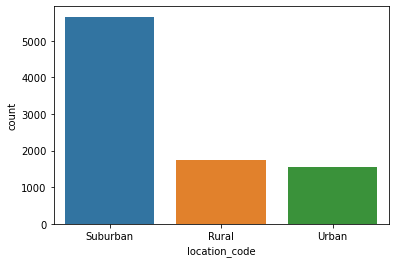

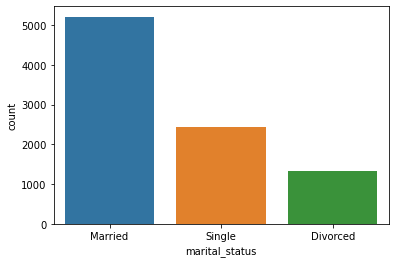

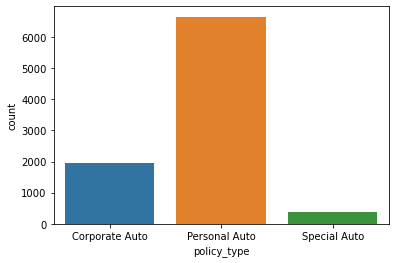

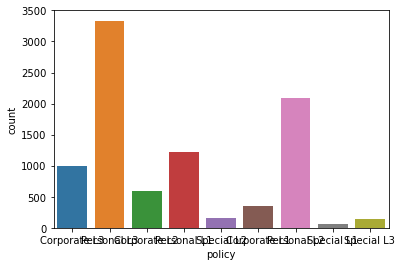

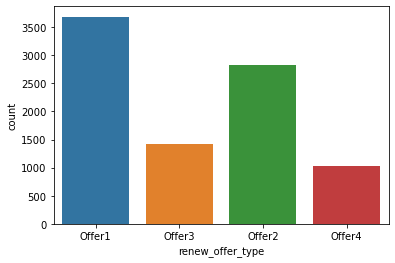

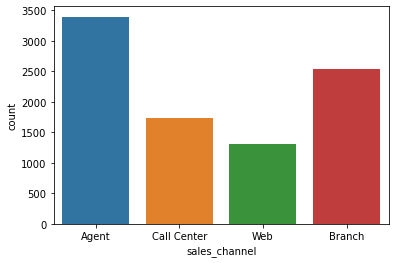

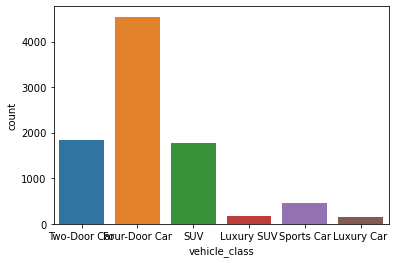

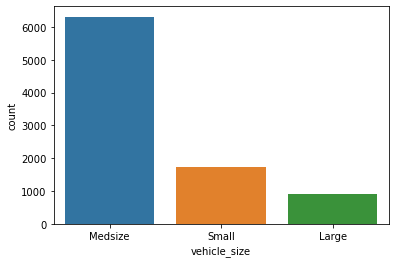

In [122]:
#check each column visually to see values
for val in X_Cat.columns:
    sns.countplot(x=data[val])
    plt.show()

In [123]:
#clean up date format
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')

In [124]:
#data.dtypes

### Deal with NaN values #

In [125]:
data.isna().sum()
# since there are no NaN values, we dont have to replace / deal with NaN's

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### Categorical Features #

In [126]:
X_cat = data.select_dtypes(include=np.object)

In [127]:
#X_cat.head()

### Numerical Features #

In [128]:
X_num = data.select_dtypes(include=np.number)

In [129]:
#X_num.head()

### Exploration #

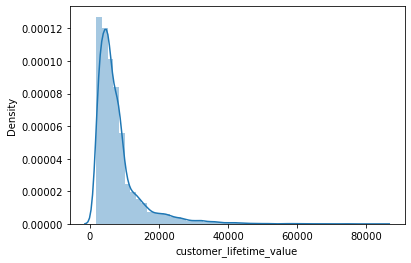

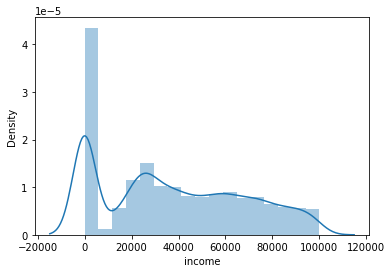

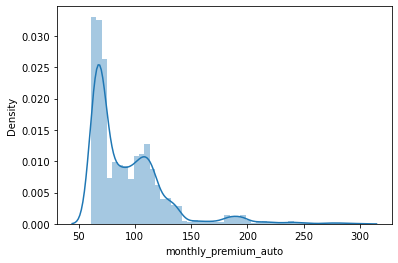

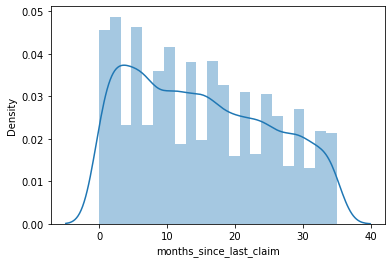

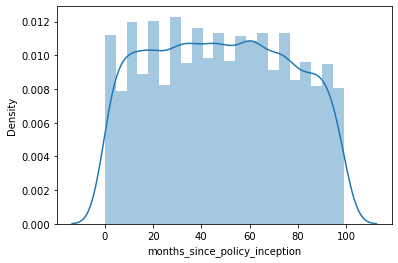

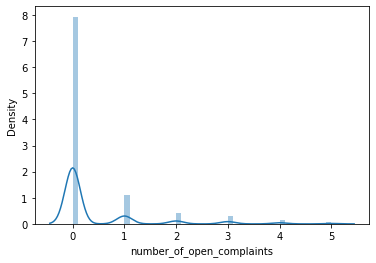

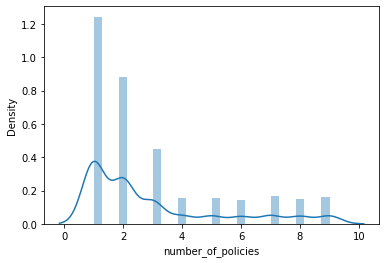

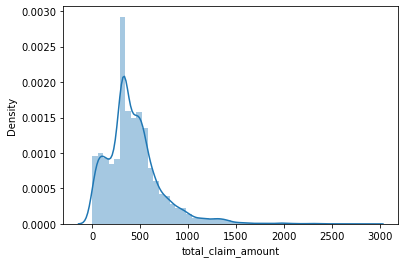

In [130]:
#check the distribution of values per each numerical column
for val in X_num.columns:
    sns.distplot(X_num[val])
    plt.show()

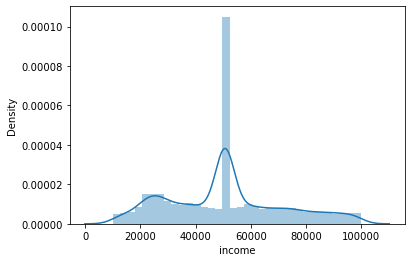

In [131]:
#adjusting the Income column 0 values by replacing it with the mean
#in the lesson we filtered them out entirely? is the approach very different or can be used depending on the approach?
#data['income'] = np.where(data['income']<=0,0,data['income'])
# now calculate mean of the new column, exluding zeros in the count 
mean = np.sum(X_num['income'])/len(X_num[X_num['income']>0])
X_num['income'] = X_num['income'].replace(0,mean)
sns.distplot(X_num['income'])
plt.show()

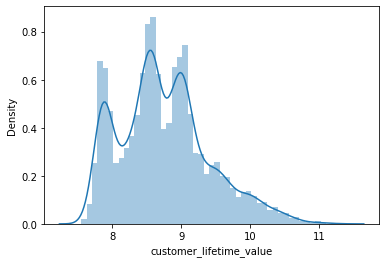

In [132]:
#testing approaches to apply on the Customer Lifetime Value
def my_log(x):
    if x == 0:
        return x
    else:
        return np.log(x)
X_num['customer_lifetime_value'] = list(map(my_log,X_num['customer_lifetime_value']))
sns.distplot(X_num['customer_lifetime_value'])
plt.show()
from scipy import stats

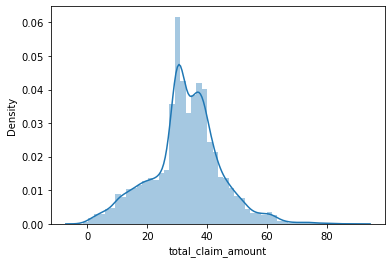

0.4712498984698542


In [133]:
#for val in X_num.columns:
#for val in X_num:
X_num['total_claim_amount'], lmbda = stats.boxcox(X_num['total_claim_amount'])  
sns.distplot(X_num['total_claim_amount'])
plt.show()
print(lmbda)

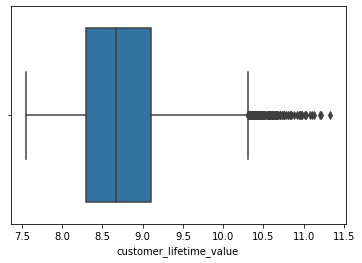

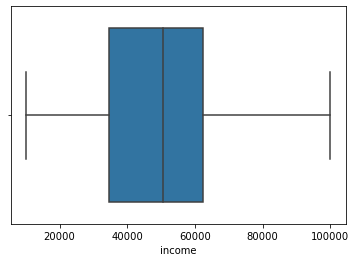

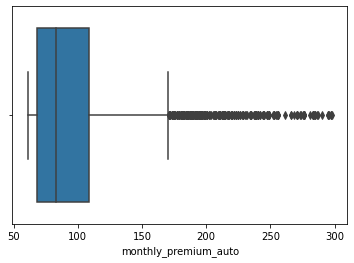

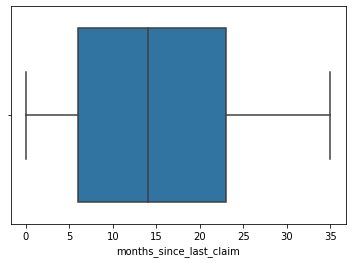

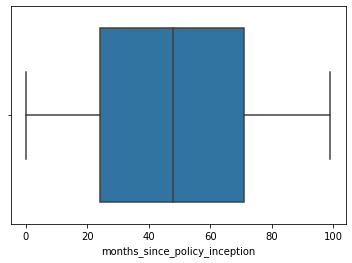

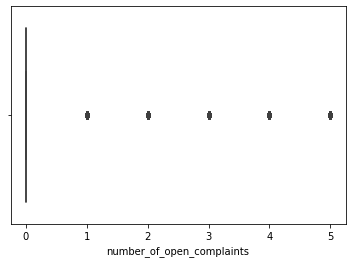

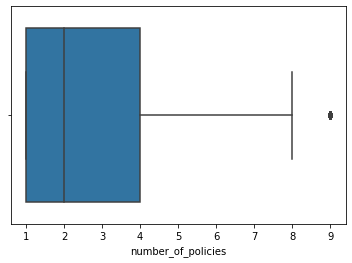

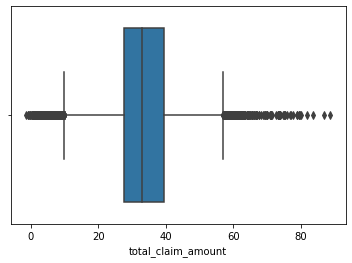

In [134]:
#visualize outliers with boxplot
for val in X_num.columns:
    sns.boxplot(X_num[val])
    plt.show()

In [135]:
#look at the descriptive statistics
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,8004.192319,37644.828113,93.192621,15.099209,48.054175,0.385241,2.970349,433.886437
std,6867.941039,30431.741597,34.358960,10.077668,27.916442,0.909666,2.391832,291.074428
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3999.497700,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,270.472690
50%,5792.439588,33947.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.442328
75%,8954.637109,62365.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.988754
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Dealing with outliers

In [136]:
#setting upper and lower limit. removing outliers with factor change to 3
iqr = np.percentile(X_num['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 3*iqr
lower_limit = np.percentile(data['customer_lifetime_value'],25) - 3*iqr

print(iqr,upper_limit,lower_limit)

-3990.397773210369 -3016.556210131108 15970.691019631107


In [137]:
#setting upper and lower limit. removing outliers with factor change to 1.5
iqr = np.percentile(X_num['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr

print(iqr,upper_limit,lower_limit)

-3990.397773210369 2969.040449684446 9985.094359815554


In [138]:
testdata = X_num.copy()
#testdata = testdata[(testdata['customer_lifetime_value']>lower_limit) & (testdata['customer_lifetime_value']<upper_limit)]

In [139]:
X_num.shape

(8971, 8)

In [89]:
testdata.shape

(8971, 8)

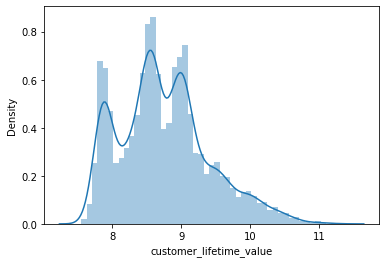

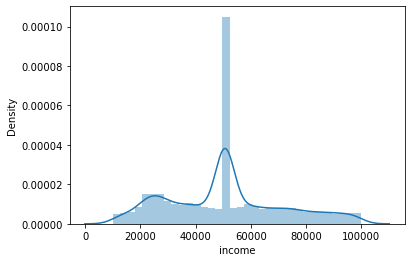

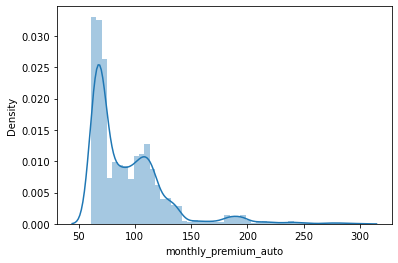

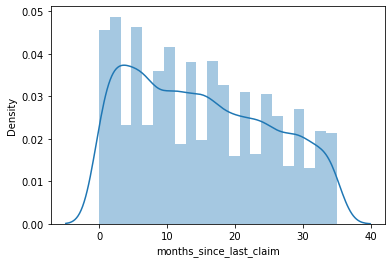

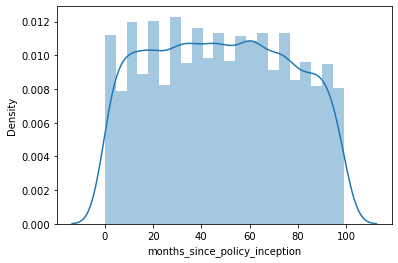

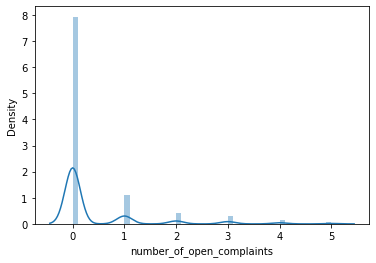

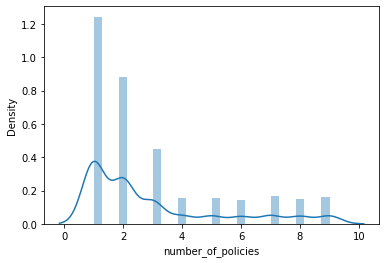

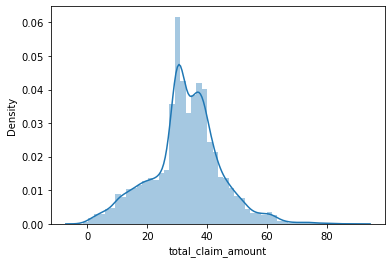

In [90]:
for val in testdata.columns:
    sns.distplot(testdata[val])
    plt.show()

## 04 - Processing Data ##

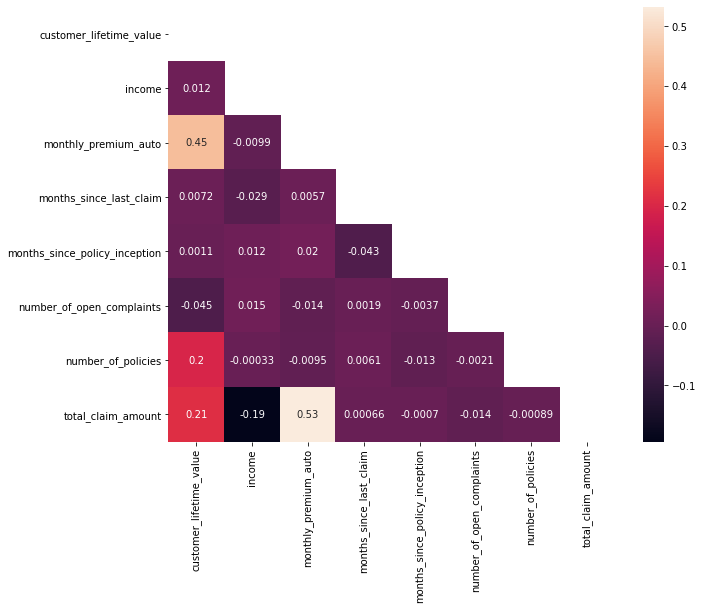

In [91]:
#correlations between different numrical columns
correlations_matrix = X_num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [140]:
#linear regression model preparation on orginal data
Y = X_num['customer_lifetime_value']
X = X_num.drop(['customer_lifetime_value'], axis=1)

### Normalization # 

In [141]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
#print(x_normalized.shape)

### Encoding Categorical Data #

In [92]:
X_cat = data.select_dtypes(include = np.object)

In [142]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
#encoder.categories_
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

### Splitting into train set and test set #

In [144]:
X = np.concatenate((x_normalized, encoded), axis=1)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

# 05 - Modeling ##

### Apply model #

In [146]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.19874438957843343

# 06 - Model Validation ##

### R2 #

In [147]:
r2 = r2_score(y_test, predictions)
r2

0.19874438957843343

### MSE #

In [148]:
mse = mean_squared_error(y_test, predictions)
print(mse)

0.3390813304217523


### RMSE #

In [149]:
rmse = math.sqrt(mse)
print(rmse)

0.5823069039791237


### MAE #

In [150]:
n = len(X_test) 
p = X_test.shape[1]

In [151]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.1874208224441546